#  IBM Data Science Capstone
## Predicting Car Accident Severity   
## Peio Alcorta

### 1. Introduction

In this project, we will be working on a case study which is to predict the severity of an accident.   

A car accident occurs every 4 minutes and on average and a person dies due to a car accident almost every 20 hours in the state of Washington, while lethal crashes went from 508 in 2016 to 525 in 2017, resulting in the death of 555 people. Our purpose is to develop an algorithm which given the weather and the road conditions, among some other features, predicts the probability of getting into a car accident and how severe it would be so that it encourages the driver to drive more carefully or even change the travel if possible.   





### 2. Data

#### 2.1 Data Understanding

The dataset used for this project is based on car accidents which have taken place within the city of Seattle, Washington from the year 2004 to 2020. This data is regarding car accidents the severity of each car accidents along with the time and conditions under which each accident occurred. The data set used for this project can be downloaded from:  


https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv  

The Metadata of the data can be found here:  

https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf  

The original dataset contains 194,673 rows, one for each traffic accident, and 38 columns, which encode several aspects of each accident, such as, location, severity, weather condition...   

The aim of this project is to develop a Machine Learning algorithm that predicts the severity of an accident. For that purpose, we will use the variable *SEVERITYCODE* which encodes the severity of the accident by giving value 1 if the accident entailed property damage only, and 2 if it entailed physical or health damage too.  




#### 2.2 Data Preparation

Appart from the severity code, a total of 6 variables (columns) are selected from the dataset. Apart from the severity code, a total of 6 variables (columns) are selected from the dataset. We restrict our attention to just those variables which we believe will have predictive power on the severity of the accident. These variables comprise both external conditions (weather, road, lighting), as well as human conditions (speed, drugs, inattention):  


Variable | Description
---------|------------
WEATHER | Weather conditions (Overcast/ Raining/ Clear...)
LIGHTCOND | Light conditions  (Dawn/ Daylight/ Dark...)
ROADCOND | Road condition (Wet/ Dry/ Ice ...)
ADDRTYPE | Collision address type (Alley/ Block/ Intersection)
INATTENTIONIND | The driver was inattentive (Yes/No/Unknown)
SPEEDING | The car was above the speed limit (Yes/No/Unknown)
UNDERINFL | The driver was under the influence (Yes/No/Unknown)  




### 3. Methodology

#### 3.1 Data preparation and visualization

We begin our project by importing all the necessary packages.  


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

Next, we import the required data, which is contained in the CSV file "Data-Collisions.csv". We visualize the first five rows of the dataset in order to have an approximate idea of how these data look. In addition, we display the dimensions of our dataset.  



In [3]:
data = pd.read_csv("Data-Collisions.csv")
data.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
data.shape

(194673, 38)

As we can see, or data contains 194,673 accidents (rows) and 38 features or variables (columns).   Originally, as we already mentioned, the variable SEVERITYCODE is encoded by giving value 1 if the accident entailed property damage only, and 2 if it entailed physical or health damage too.  For simplicity, we redefine it giving value 0 for no physical damage, and 1 if there are physical damages.  

In [5]:
data.loc[data['SEVERITYCODE'] ==1, ["SEVERITYCODE"]]=0
data.loc[data['SEVERITYCODE'] ==2, ["SEVERITYCODE"]]=1

The variable UNDERINFL, is originally encoded as Y or 1 if there is evidence that the driver was under the influence, and as N or 0 if not. We again redefine it as 0 (if not under the influence), and as 1 (if under the influence).  

In [6]:
data.loc[data['UNDERINFL'] =="Y", ["UNDERINFL"]]=1
data.loc[data['UNDERINFL'] =="1", ["UNDERINFL"]]=1
data.loc[data['UNDERINFL'] =="N", ["UNDERINFL"]]=0
data.loc[data['UNDERINFL'] =="0", ["UNDERINFL"]]=0

Similarly, we modify the variable SPEEDING, which originally is encoded as Y if there is evidence that the driver was driving above the speed limit, and as missing value if there is a lack of evidence. We redefine it as 0 (if not evidence of speeding), and as 1 (if evidence of speeding).

In [7]:
data.loc[pd.notnull(data['SPEEDING']), ["SPEEDING"]]=1
data.loc[pd.isnull(data['SPEEDING']), ["SPEEDING"]]=0

We also modify the variable INATTENTIONIND, which originally is encoded as Y if there is evidence that the driver was not paying attention while driving, and as a missing value if there is no such evidence. We again redefine it as 0 (if not evidence of inattention), and as 1 (if evidence of inattention).

In [8]:
data.loc[pd.notnull(data['INATTENTIONIND']), ["INATTENTIONIND"]]=1
data.loc[pd.isnull(data['INATTENTIONIND']), ["INATTENTIONIND"]]=0

Now, let us work a little bit with the variable ROADCOND (road condition). We substitute the entries for which the road condition appears as "Unknown" or "Other" for missing values.

In [9]:
data.loc[data['ROADCOND'] =="Unknown", "ROADCOND"] =np.nan
data.loc[data['ROADCOND'] =="Other", "ROADCOND"] =np.nan

Next, we work with the variable LIGHTCOND (lighting conditions). First, we substitute the entries for which the LIGHTCOND appears as "Unknown" or "Other" for missing values. Next, we gather all the different entries for which conditions were dark without proper lighting ("Dark - Unknown Lighting", "Dark - No Street Lights", "Dark - Street Lights Off") for "Dark - No Lights".

In [10]:
data.loc[data['LIGHTCOND']=="Unknown", "LIGHTCOND"]=np.nan
data.loc[data['LIGHTCOND'] =="Other", ["LIGHTCOND"]]=np.nan
data.loc[data['LIGHTCOND'] =="Dark - Unknown Lighting", ['LIGHTCOND']]="Dark - No Lights"
data.loc[data['LIGHTCOND'] =="Dark - No Street Lights", ['LIGHTCOND']]="Dark - No Lights"
data.loc[data['LIGHTCOND'] =="Dark - Street Lights Off", ['LIGHTCOND']]="Dark - No Lights"

Then, we replace the entries for which the WEATHER appears as "Unknown" or "Other" for missing values. In addition, we replace entries for which weather appears as "Partly Cloudy" for "Clear". Since we do not expect partly cloudy weather to have a different impact on accident severity than clear weather.  


In [11]:
data.loc[data['WEATHER']  =="Unknown", "WEATHER"]  =np.nan
data.loc[data['WEATHER'] =="Other", ["WEATHER"]]=np.nan
data.loc[data['WEATHER'] =="Partly Cloudy", ["WEATHER"]]="Clear"

Finally, we remove all the unnecessary columns in our dataset and we save the new dataset as "data2". After that, we remove every row containing any missing values.

In [12]:
data2=data[["SEVERITYCODE","ADDRTYPE","WEATHER","ROADCOND","LIGHTCOND","UNDERINFL","SPEEDING","INATTENTIONIND"]]

In [13]:
data2=data2.dropna()
data2.shape

(169247, 8)

As we can see, our new dataset contains 169,247 rows and 8 columns. After removing all the missing values, we have not lost a dramatic amount of information.  

Now, let us plot the distributions of each of the variables in our dataset. 

Text(0.5, 1.0, 'SEVERITYCODE')

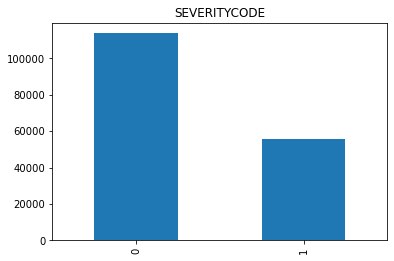

In [14]:
data2['SEVERITYCODE'].value_counts().plot(kind='bar')
plt.title("SEVERITYCODE")

Text(0.5, 1.0, 'WEATHER')

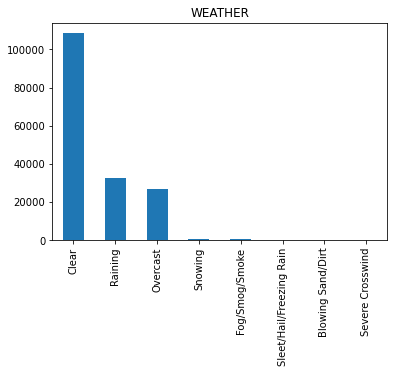

In [15]:
data2['WEATHER'].value_counts().plot(kind='bar')
plt.title("WEATHER")

Text(0.5, 1.0, 'LIGHTCOND')

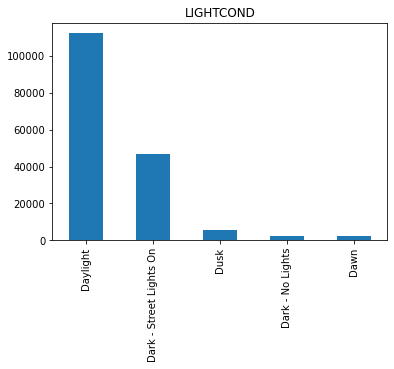

In [16]:
data2['LIGHTCOND'].value_counts().plot(kind='bar')
plt.title("LIGHTCOND")

Text(0.5, 1.0, 'ROADCOND')

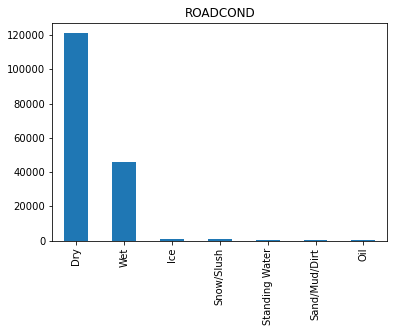

In [17]:
data2['ROADCOND'].value_counts().plot(kind='bar')
plt.title("ROADCOND")

Text(0.5, 1.0, 'ADDRTYPE')

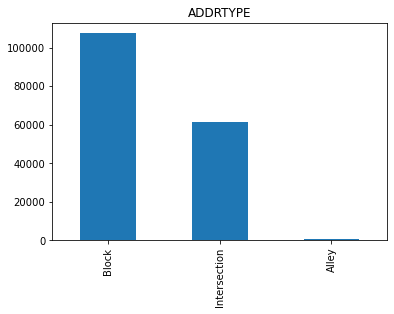

In [18]:
data2['ADDRTYPE'].value_counts().plot(kind='bar')
plt.title("ADDRTYPE")

Text(0.5, 1.0, 'INATTENTIONIND')

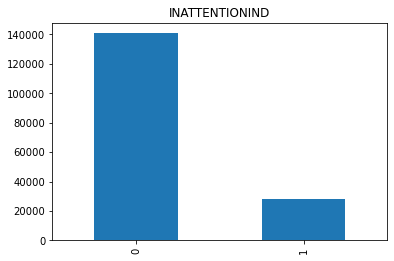

In [19]:
data2['INATTENTIONIND'].value_counts().plot(kind='bar')
plt.title("INATTENTIONIND")

Text(0.5, 1.0, 'SPEEDING')

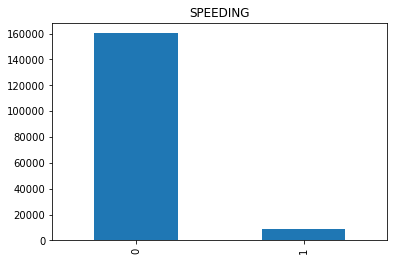

In [20]:
data2['SPEEDING'].value_counts().plot(kind='bar')
plt.title("SPEEDING")

Text(0.5, 1.0, 'UNDERINFL')

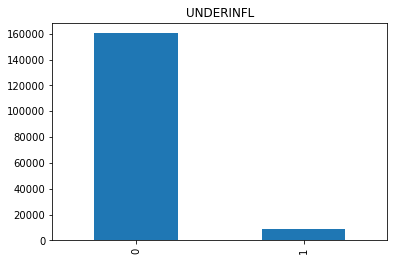

In [21]:
data2['UNDERINFL'].value_counts().plot(kind='bar')
plt.title("UNDERINFL")

As we have seen, regarding the severity code, we are dealing with an unbalanced dataset. Most of the accidents entail only property damages. The proportion of accidents which entail physical damage is about 32%:

In [22]:
data2["SEVERITYCODE"].mean()

0.32817125266622155

We are ready to begin our analysis. We first set the random seed to 11 and then split the dataset into training and testing sets.

#### 3.2 Algorithms

In [23]:
random.seed(11)
x,y=data2[["ADDRTYPE","WEATHER","ROADCOND","LIGHTCOND","UNDERINFL","SPEEDING","INATTENTIONIND"]],data2[["SEVERITYCODE"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2)

Now, since the models we will train require dummy variables instead of categorical variables with multiple values as predictive features, we perform one-hot encoding in the predictive features of both training and testing sets.

In [24]:
x_train_ohd = pd.get_dummies(x_train,drop_first=True)
x_test_ohd = pd.get_dummies(x_test,drop_first=True)

#### Classification Tree Model

We use the Decision Tree Classifier from the scikit-learn library to train a classification random tree model. The criterion chosen for the classifier is "entropy" and the max depth set to 6.

In [25]:
model_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
model_tree.fit(x_train_ohd, y_train)
y_hat_tree = model_tree.predict(x_test_ohd)

#### Logistic Regression

We implement Logistic Regression from the scikit-learn library to train our Logistic Regression model. The C parameter used for regularization strength is set to 0.01, whereas the method for the solver is set to "liblinear".

In [26]:
model_logreg = LogisticRegression(C=0.01, solver='liblinear')
model_logreg.fit(x_train_ohd, y_train.values.ravel())
y_hat_logreg = model_logreg.predict(x_test_ohd)

#### K-Nearest Neighbors

We use the K-Nearest Neighbor classifier from the scikit-learn library to train the K-Nearest Neighbor machine learning model. The optimal value of the number of neighbors used (k), when we try different tuning values up to 10 NN,  as shown below, is found at k=10.

The optimal value for k is 8


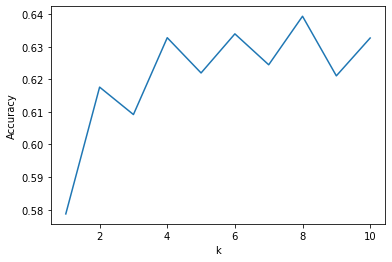

In [29]:
Ks=11
accs=np.zeros((Ks-1))
for n in range(1,Ks):
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(x_train_ohd, y_train.values.ravel())
    yhat = kNN_model.predict(x_test_ohd)
    accs[n-1]=accuracy_score(y_test, yhat);
    
plt.plot(range(1,Ks),accs)
plt.xlabel("k")
plt.ylabel("Accuracy")
k=accs.argmax()+1
print("The optimal value for k is " + str(k))

In [30]:
model_KNN = KNeighborsClassifier(n_neighbors = k)
model_KNN.fit(x_train_ohd, y_train.values.ravel())
y_hat_KNN = model_KNN.predict(x_test_ohd)

### 4. Results

#### 4.1 Random Tree

In [31]:
print(classification_report(y_test, y_hat_tree, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80     22680
     class 1       0.50      0.01      0.02     11170

    accuracy                           0.67     33850
   macro avg       0.58      0.50      0.41     33850
weighted avg       0.61      0.67      0.54     33850



#### 4.2 Logistic Regression

In [32]:
print(classification_report(y_test, y_hat_logreg, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.68      0.97      0.80     22680
     class 1       0.46      0.05      0.10     11170

    accuracy                           0.67     33850
   macro avg       0.57      0.51      0.45     33850
weighted avg       0.61      0.67      0.57     33850



#### 4.3 K-Nearest Neighbors

In [33]:
print(classification_report(y_test, y_hat_KNN, target_names=['class 0', 'class 1'])) 

              precision    recall  f1-score   support

     class 0       0.68      0.89      0.77     22680
     class 1       0.37      0.14      0.20     11170

    accuracy                           0.64     33850
   macro avg       0.52      0.51      0.48     33850
weighted avg       0.58      0.64      0.58     33850



### 5. Discussion

Precision is obtained by dividing true positives by the sum of true positive plus false positives. The recall is obtained by dividing true positives by true positive plus false negatives. f1-score is a measure of the accuracy of the model, which is the harmonic mean of the model’s precision and recall. We can see that in terms of overall accuracy, the model that gives the best results are both the random tree and logistic regression models, both with an accuracy score of 0.67. However, both the overall precision and the overall f1-score given by the KNN model is better than the one offered by any of the other two methods.

### 6. Conclusions

We see that the trained models could have performed much better if various improvements were made. On the one hand, dealing with an unbalanced dataset regarding the target variables produces a biased model that is biased towards the higher prevalence of one of the groups. Balancing this dataset would be a huge improvement for our project. On the other hand, if we had fewer missing variables or unknown entries, our information regarding predictive features would be much richer. This is left as further research.